## Exercice n°2 (1/2 h)



Télécharger le Visual Transformer (DeiT) hébergé sur Hugging Face à l'adresse :
"facebook/deit-tiny-patch16-224". Répondez aux questions suivantes en vous appuyant sur des éléments de l'architecture ou d'une des fonctions associées au modèle (en particulier la fonction forward()).
- Quelle est la taille de l'espace latent de ce transformer ?
- Comment l'image est-elle tokenisée et en quoi consiste l'embedding (valeurs et position) ?
- Quelle est la signification du premier token ?
- Déterminer et interpréter l'output associé à l'image fournie dans le TP n°2 (cat.jpg) à l'aide de ce modèle.
- Visualiser les scores attentionnels associés au premier token pour les premières têtes de la première couche attentionnelle. Comparer à ce qu'on avait obtenu pour un ResNet50 pré-entraîné sur ImageNet.

Download the Visual Transformer (DeiT) hosted on Hugging Face at:
‘facebook/deit-tiny-patch16-224’. Answer the following questions based on elements of the architecture or one of the functions associated with the model (in particular the forward() function).
- What is the size of this transformer's latent space?
- How is the image tokenised and what does the embedding consist of (values and position)?
- What is the meaning of the first token?
- Determine and interpret the output associated with the image provided in TP No. 2 (cat.jpg) using this model.
- Visualise the attention scores associated with the first token for the first heads of the first attention layer. Compare this to what we obtained for a ResNet50 pre-trained on ImageNet.


---
*AI PROMPT*

`write code for downloading the visual transformer hosted at "‘facebook/deit-tiny-patch16-224’"`

---

In [34]:
# AI GENERATED

from transformers import AutoImageProcessor, AutoModelForImageClassification

model_name = "facebook/deit-tiny-patch16-224"

# Load the feature extractor (preprocessor)
processor = AutoImageProcessor.from_pretrained(model_name)

# Load the model
model = AutoModelForImageClassification.from_pretrained(model_name)

print(f"Model '{model_name}' and its feature extractor loaded successfully.")

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Model 'facebook/deit-tiny-patch16-224' and its feature extractor loaded successfully.


***AI PROMPT***

---

Prepare me for the following task: <details><summary>Exercise definition</summary>

Download the Visual Transformer (DeiT) hosted on Hugging Face at: ‘facebook/deit-tiny-patch16-224’. Answer the following questions based on elements of the architecture or one of the functions associated with the model (in particular the forward() function).

What is the size of this transformer's latent space?
How is the image tokenised and what does the embedding consist of (values and position)?
What is the meaning of the first token?
Determine and interpret the output associated with the image provided in TP No. 2 (cat.jpg) using this model.
Visualise the attention scores associated with the first token for the first heads of the first attention layer. Compare this to what we obtained for a ResNet50 pre-trained on ImageNet.
.</details>

--

define again what. atransformers atent space is.

Recap tokenisation and resulting embeddings as presented in the course.

Recap how to inspect a model to gain further insights and write respective code to conduct such an analysis analogous to the exercises we have finished

---


#### ***Truncated/Edited LLM output***

---

### 1. What is a transformer “latent space”?


#### Definition
> The latent space of a transformer is the vector space in which **tokens are represented and transformed** across layers.
> Each token is represented by a vector of fixed dimension $ d_{\text{model}} $ , and all attention, mixing, and semantic reasoning happens in this space.

Key properties:

* Dimension: **fixed**, independent of sequence length
* Tokens interact **only through attention** in this space
* Each layer transforms:
  $$
  X \in \mathbb{R}^{(N_{\text{tokens}} \times d_{\text{model}})}
  $$

### 2. DeiT-Tiny latent space size

Model:
`facebook/deit-tiny-patch16-224`

#### Key architectural parameters (must know)

* Image size: **224 × 224**
* Patch size: **16 × 16**
* Embedding dimension (latent space): **192**
* Transformer depth: 12 layers
* Attention heads: 3

#### Answer to question 1

> **The size of the transformer’s latent space is 192.**

Meaning:

* Each token is a vector in  $\mathbb{R}^{192}$
* Q, K, V projections live in this space
* All semantic reasoning happens there

You can verify programmatically:

In [35]:
model.config.hidden_size

192

*Critical Review*

**Good enough**

However ChatGPT rather than Gemini tends to propose loading the model by the transformers own module `DeiTImageProcessor`rather than the "huggingface-way"

---
### 3. How the image is tokenised (Vision Transformer recap)

#### 3.1 Patch tokenisation

The image is split into **non-overlapping patches**:

* Patch size: 16×16
* Number of patches:
  $$
  (224 / 16)^2 = 14^2 = 196
  $$

Each patch:

* has shape (16×16×3)
* is flattened into a vector of size 768
* is linearly projected into $$ \mathbb{R}^{192} $$

This projection is equivalent to:

> a **Conv2d with kernel=16, stride=16**, followed by flattening

---

## 3.2 Tokens used by DeiT

DeiT uses:

* **196 patch tokens**
* **1 class token**
  → total **197 tokens**

So input to the transformer is:
$$
X \in \mathbb{R}^{197 \times 192}
$$

---

## 3.3 Embedding = values + position

Each token embedding consists of:

1. **Patch content embedding**

   * learned linear projection of pixel values
2. **Positional embedding**

   * learned vector encoding spatial position
3. (for class token) a **learned global query vector**

Formally:
$$
X_0 = [\text{CLS}; P_1; \dots; P_{196}] + E_{\text{pos}}
$$

**Why positional embeddings are required**
Attention is permutation-invariant. Without positions, the model would not know where patches come from.

---



### 4. Meaning of the first token
#### Answer

> The first token is the **class token**.
> It is a learned vector whose role is to aggregate global information from all image patches through self-attention, and it is used as the final image representation for classification.

Interpretation:

* It starts as a **query**
* Through attention, it pulls information from all patch tokens
* After the last transformer layer, it represents the **entire image**

This is conceptually similar to:

* **global average pooling** in CNNs
* but learned, adaptive, and content-dependent



---

### 5. Determine and interpret output for `cat.jpg`

Preprocessing (must match ImageNet)

Exactly as in TP2 / TP3:






In [36]:
# Clone the repo
! git clone https://github.com/nanopiero/ML_S5_etudiants.git


fatal: destination path 'ML_S5_etudiants' already exists and is not an empty directory.


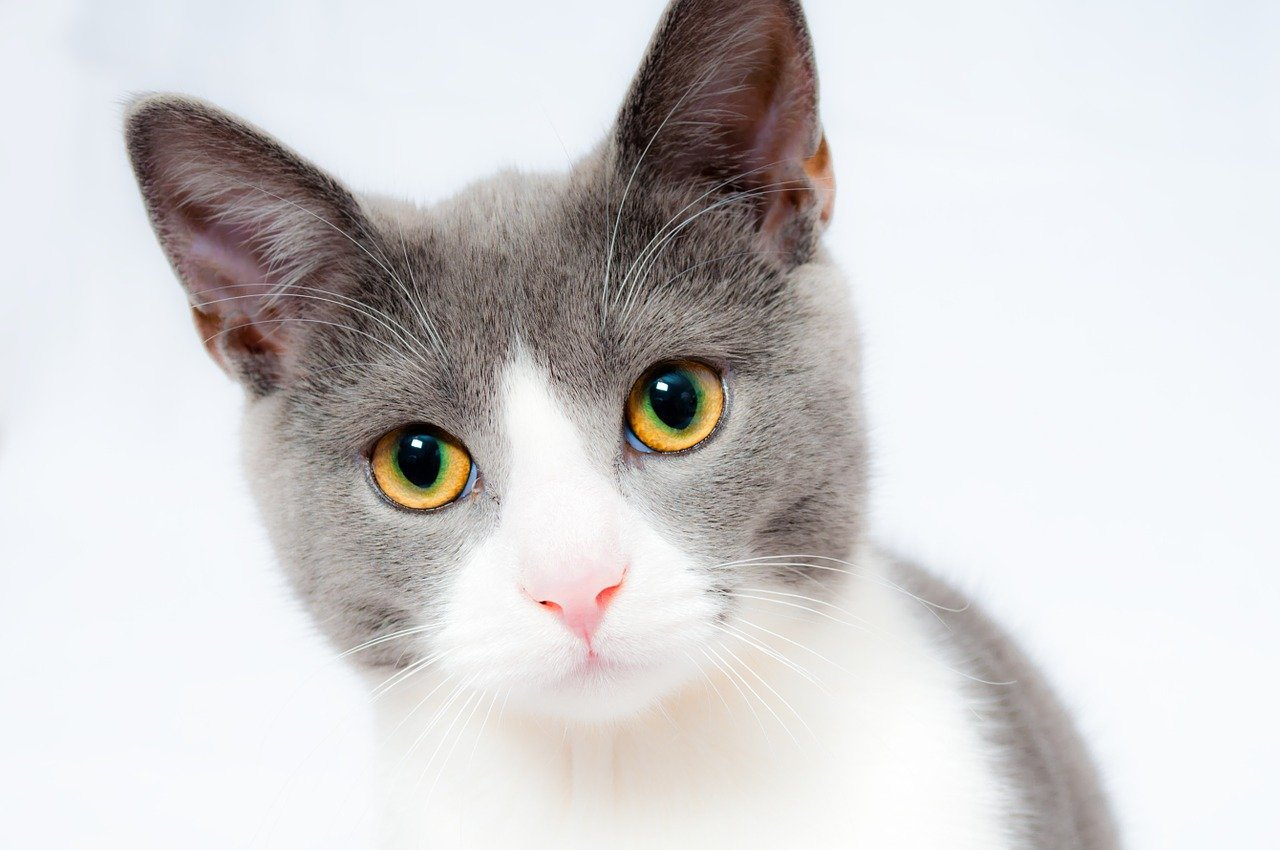

In [37]:
# Load the jpg image of a cat with the library PIL
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
root = 'ML_S5_etudiants/practicals/P2'
path = os.path.join(root, 'cat.jpg')
image = Image.open(path).convert("RGB")
image




In [38]:
# This preprocessor handles resizing, normalization and conversion to tensors
image = processor(image, return_tensors="pt")

#### 5.2 Model prediction

In [39]:
with torch.no_grad(): # Disable gradient calculation for inference to save memory and speed up computation
    outputs = model(**image) # Pass the preprocessed image through the model to get raw predictions

logits = outputs.logits # Extract the raw, unnormalized prediction scores for each class
pred = logits.argmax(dim=-1) # Get the index of the class with the highest logit, which is the predicted class

### Interpretation

* Output is a vector of size **1000**
* Each value corresponds to an ImageNet class
* The predicted class should be **a cat class** (e.g. tabby cat, tiger cat, etc.)



---

### 7. Visualising attention scores (first token, first layer)

Device: cuda
Loaded: ML_S5_etudiants/practicals/P2/cat.jpg | size: (1280, 850)


Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Hidden size (latent dim): 192
Num layers: 12
Num heads: 3
Image size: 224 Patch size: 16
Prediction: 285 Egyptian cat
Attention tensor (layer 0) shape: (1, 3, 197, 197)


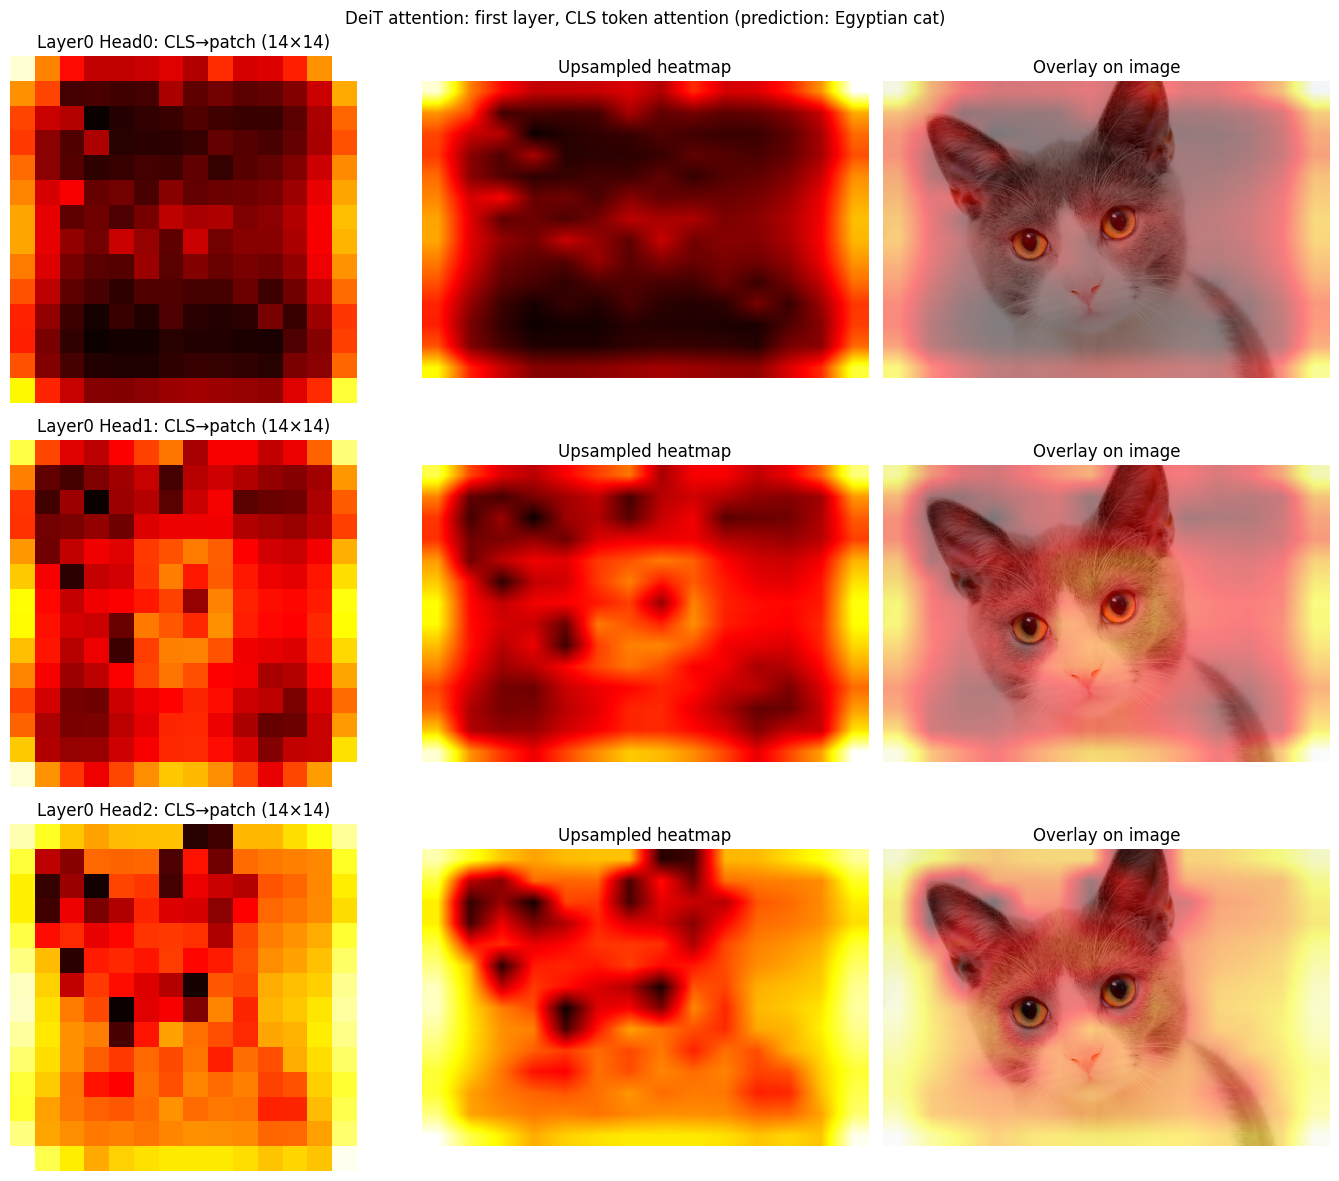

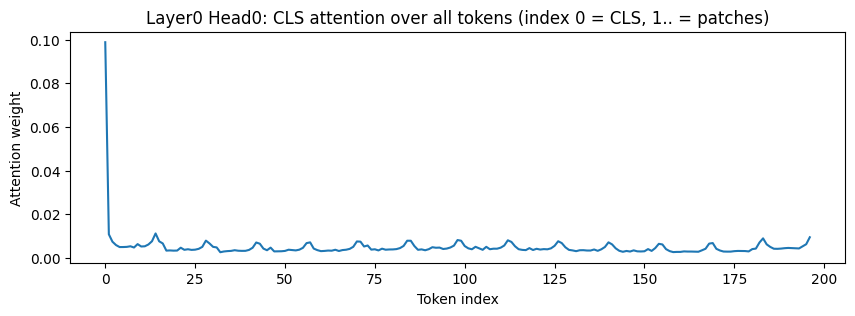

In [43]:
# TP-style code: DeiT (facebook/deit-tiny-patch16-224)
# Visualize attention scores of the FIRST TOKEN (CLS) for the FIRST HEADS
# of the FIRST ATTENTION LAYER, and overlay them on the input image.

#

# ----------------------------
# 0) Repro / device
# ----------------------------
torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)


# ----------------------------
# 1) Load image (cat.jpg from TP2 repo)
# ----------------------------

image = Image.open(path).convert("RGB")
print("Loaded:", path, "| size:", image.size)


# ----------------------------
# 2) Load DeiT + processor (Hugging Face)
# ----------------------------
from transformers import AutoImageProcessor, AutoModelForImageClassification

model_name = "facebook/deit-tiny-patch16-224"

# Load the feature extractor (preprocessor)
processor = AutoImageProcessor.from_pretrained(model_name)

# Load the model
model = AutoModelForImageClassification.from_pretrained(
    model_name,
    output_attentions=True  # request attentions in outputs (config-level)
).to(device)
model.eval()

print("Hidden size (latent dim):", model.config.hidden_size)
print("Num layers:", model.config.num_hidden_layers)
print("Num heads:", model.config.num_attention_heads)
print("Image size:", model.config.image_size, "Patch size:", model.config.patch_size)


# ----------------------------
# 3) Forward pass to collect attentions
# ----------------------------
inputs = processor(images=image, return_tensors="pt").to(device)

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits  # (B, 1000)
pred_id = int(torch.argmax(logits, dim=-1).item())
pred_label = model.config.id2label[pred_id]
print("Prediction:", pred_id, pred_label)

attentions = outputs.attentions  # list length = num_layers
# Each item: (B, num_heads, N, N) where N = num_tokens = 1 + num_patches
print("Attention tensor (layer 0) shape:", tuple(attentions[0].shape))


# ----------------------------
# 4) Utilities for visualization
# ----------------------------
def show_image(ax, pil_img, title=None):
    ax.imshow(pil_img)
    ax.axis("off")
    if title is not None:
        ax.set_title(title)

def attention_cls_to_map(att_layer, head_index=0, batch_index=0):
    """
    att_layer: (B, H, N, N)
    Returns:
      att_map_14: attention from CLS token to patch tokens, reshaped to (14, 14)
      att_vec: raw attention vector length N (CLS -> all tokens)
    """
    # CLS token is token 0
    # Grab CLS attention over all tokens: shape (N,)
    att_vec = att_layer[batch_index, head_index, 0, :].detach().cpu().numpy()

    # Discard CLS->CLS entry, keep CLS->patches (196 for 224/16)
    cls_to_patches = att_vec[1:]

    # Infer grid size from number of patches (should be 196 -> 14x14)
    num_patches = cls_to_patches.shape[0]
    grid = int(np.sqrt(num_patches))
    if grid * grid != num_patches:
        raise ValueError(f"Num patches {num_patches} is not a perfect square.")

    att_map = cls_to_patches.reshape(grid, grid)

    return att_map, att_vec

def normalize_01(x, eps=1e-9):
    x = x.astype(np.float32)
    x = x - x.min()
    x = x / (x.max() + eps)
    return x

def upsample_to_image(att_map, target_size):
    """
    att_map: (g, g) numpy
    target_size: (W, H) for PIL
    Returns upsampled numpy (H, W) in [0,1]
    """
    att_norm = normalize_01(att_map)
    att_img = Image.fromarray((att_norm * 255).astype(np.uint8))
    att_img = att_img.resize(target_size, resample=Image.BILINEAR)
    att_up = np.asarray(att_img).astype(np.float32) / 255.0
    return att_up

def overlay_heatmap_on_image(pil_img, heatmap_01, alpha=0.5):
    """
    pil_img: RGB PIL
    heatmap_01: (H,W) float in [0,1]
    Returns an RGB numpy image with overlay.
    """
    img_np = np.asarray(pil_img).astype(np.float32) / 255.0
    heat = heatmap_01
    # Use matplotlib colormap to create RGB heatmap
    cmap = plt.get_cmap("hot")
    heat_rgb = cmap(heat)[..., :3]  # drop alpha from colormap output

    overlay = (1 - alpha) * img_np + alpha * heat_rgb
    overlay = np.clip(overlay, 0, 1)
    return overlay


# ----------------------------
# 5) Visualize first layer, first heads: CLS attention
# ----------------------------
first_layer_att = attentions[0]  # (B, H, N, N)
num_heads = first_layer_att.shape[1]

# In DeiT-tiny, num_heads is typically 3.
heads_to_show = list(range(min(3, num_heads)))  # "first heads"

W, H = image.size

fig, axes = plt.subplots(len(heads_to_show), 3, figsize=(14, 4 * len(heads_to_show)))
if len(heads_to_show) == 1:
    axes = np.expand_dims(axes, axis=0)

for row, h_idx in enumerate(heads_to_show):
    att_map_14, att_vec = attention_cls_to_map(first_layer_att, head_index=h_idx, batch_index=0)

    # 14x14 heatmap (patch grid)
    ax0 = axes[row, 0]
    ax0.imshow(att_map_14, cmap="hot")
    ax0.axis("off")
    ax0.set_title(f"Layer0 Head{h_idx}: CLS→patch (14×14)")

    # Upsampled to image resolution
    att_up = upsample_to_image(att_map_14, target_size=(W, H))
    ax1 = axes[row, 1]
    ax1.imshow(att_up, cmap="hot")
    ax1.axis("off")
    ax1.set_title("Upsampled heatmap")

    # Overlay on original image
    overlay = overlay_heatmap_on_image(image, att_up, alpha=0.5)
    ax2 = axes[row, 2]
    ax2.imshow(overlay)
    ax2.axis("off")
    ax2.set_title("Overlay on image")

plt.suptitle(f"DeiT attention: first layer, CLS token attention (prediction: {pred_label})", y=0.98)
plt.tight_layout()
plt.show()


# ----------------------------
# 6) (Optional) Show CLS attention distribution over ALL tokens (including CLS)
# ----------------------------
# This is useful to confirm token indexing and overall distribution.
head0_vec = first_layer_att[0, 0, 0, :].detach().cpu().numpy()  # CLS->all tokens
plt.figure(figsize=(10, 3))
plt.plot(head0_vec)
plt.title("Layer0 Head0: CLS attention over all tokens (index 0 = CLS, 1.. = patches)")
plt.xlabel("Token index")
plt.ylabel("Attention weight")
plt.show()




### 8. Comparison with ResNet50 (critical conceptual answer)

#### ResNet50 (TP2)

* Local convolutions
* Hierarchical feature maps
* Receptive field grows gradually
* Global reasoning only at deep layers
* Implicit aggregation (pooling)

#### DeiT / ViT

* Global interactions **from the first layer**
* No notion of spatial locality except via position embeddings
* Explicit, learnable weighting of relationships
* Class token dynamically selects relevant regions

#### Conclusion

> Unlike ResNet50, which builds global representations progressively through stacked local convolutions and increasing receptive fields, DeiT uses self-attention to directly model global interactions between all image patches from the first layer, allowing the class token to explicitly aggregate semantically relevant regions of the image.